Colab should save automatically (like Google Docs, etc.), but ensure to click File --> Save before closing out of the tab

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# arrests= pd.read_csv("/content/ArrestsCSV.csv")
cvillecrimes= pd.read_csv("/content/Crime_Data.csv") #This reads in the charlottesville crime csv file
cvillecrimes.info() #Basic info
cvillecrimes.head() #What does the data look like?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25111 entries, 0 to 25110
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RecordID          25111 non-null  int64  
 1   Offense           25111 non-null  object 
 2   IncidentID        25111 non-null  int64  
 3   BlockNumber       23322 non-null  float64
 4   StreetName        25111 non-null  object 
 5   Agency            25111 non-null  object 
 6   DateReported      25111 non-null  object 
 7   HourReported      25111 non-null  int64  
 8   ReportingOfficer  25085 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.7+ MB


,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported,ReportingOfficer
0,1,Assist Citizen - Mental/TDO/ECO,202400034093,900.0,"ELLIOTT AVE, A",CPD,2024/10/02 00:24:02+00,2024,"Venereo, Arturo"
1,2,Larceny - Of Veh Parts/Access,202400034075,1600.0,"6TH ST SE, 28",CPD,2024/10/01 21:38:47+00,1738,"Kirby, Tyree"
2,3,Hit and Run,202400034071,900.0,EMMET ST N,CPD,2024/10/01 21:11:45+00,1711,"Bland, Johnnà"
3,4,Disorderly Conduct,202400034068,900.0,"ST CLAIR AVE, A",CPD,2024/10/01 20:59:17+00,1659,"Prevost, Payten"
4,5,Lost/FoundProperty,202400034047,700.0,RUGBY RD,CPD,2024/10/01 18:23:15+00,1423,"Brannon, Devin"


In [8]:
crimes = cvillecrimes.Offense.unique()
crimes

array(['Assist Citizen - Mental/TDO/ECO', 'Larceny - Of Veh Parts/Access',
       'Hit and Run', 'Disorderly Conduct', 'Lost/FoundProperty',
       'Crisis Assessment', 'Trespass', 'Assault Simple',
       'Larceny - Shoplifitng', 'Larceny - Theft from Building',
       'Animal Complaint', 'Vandalism', 'Larceny - From Motor Vehicle',
       'Domestic Disturbance', 'Assist Agency - Backup/Assist',
       'Misc - Non-Criminal Call', 'Assist Citizen - Medical',
       'Larceny - All Other', 'Assault Aggravated',
       'Drug/Narcotics Violation', 'Suspicious Activity',
       'Forgery/Counterfeiting', 'Assault Intimidation',
       'Fraud-impersonation', 'Driving Under the Influence',
       'Shots Fired/Illegal Hunting', 'Accident - w/out Injuries',
       'Pornography', 'Assist Agency - Arrest/warrant', 'Burglary',
       'Harassment', 'Sex Offense', 'Juvenile Investigation',
       'Animal - Bite', 'Robbery - Armed', 'Fraud-credit card',
       'Sex Offense - Forcible Rape', 'Traffic S

In [ ]:
larceny_crimes = arrests[arrests['StatuteDescription'].str.contains('Larceny', case=False, na=False)]
df = pd.DataFrame(larceny_crimes)
df.head()

,ArrestID,ArrestDatetime,FirstName,HouseNumber,LastName,MiddleName,NameSuffix,Statute,StatuteDescription,Street,Race,Sex
0,1,2024/10/02 19:59:00+00,ANGEL,1600.0,ABDULLAH,ABDULSAMI,NaN,18.2-103,"Pet Larceny Shoplifting Below $1,000",5TH ST,Black,Male
28,29,2024/09/26 23:28:00+00,TASHA,1131.0,RICHARDS,NICOLE,NaN,18.2-97,"ANIMAL: DOG/HORSE/COW/ETC, LARCENY",5TH ST SW,Black,Female
29,30,2024/09/26 23:28:00+00,TASHA,1131.0,RICHARDS,NICOLE,NaN,18.2-91,BURGLARY: ENTER HOUSE TO COMMIT LARCENY/A&B/ETC,5TH ST SW,Black,Female
30,31,2024/09/26 23:28:00+00,TASHA,1131.0,RICHARDS,NICOLE,NaN,18.2-91,BURGLARY: ENTER HOUSE TO COMMIT LARCENY/A&B/ETC,5TH ST SW,Black,Female
52,53,2024/09/22 02:26:00+00,ALAYSIA,520.0,BROWN,HIYONNA,NaN,18.2-96(2),Petit Larceny Less than $1000 not from person,CLEVELAND AVE B,Black,Female


In [ ]:
df['ArrestDatetime'] = pd.to_datetime(df['ArrestDatetime'])


df['Date'] = df['ArrestDatetime'].dt.date
df['Year-Month'] = df['ArrestDatetime'].dt.to_period('M').astype(str)
df['Hour'] = df['ArrestDatetime'].dt.hour
df['Weekday'] = df['ArrestDatetime'].dt.day_name()

crime_counts_by_month = df.groupby('Year-Month').size()
crime_counts_by_month = df.groupby('Year-Month').size().reset_index(name='Crime Count')

print(crime_counts_by_month)

   Year-Month  Crime Count
0     2019-10           20
1     2019-11           13
2     2019-12           14
3     2020-01           20
4     2020-02           11
..        ...          ...
56    2024-06            9
57    2024-07            8
58    2024-08           10
59    2024-09            5
60    2024-10            1

[61 rows x 2 columns]


<ipython-input-24-70d271932ce4>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year-Month'] = df['ArrestDatetime'].dt.to_period('M').astype(str)


In [ ]:
crime_counts_by_month.plot(kind='bar', figsize=(8, 6))
plt.title('Crimes per Month')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

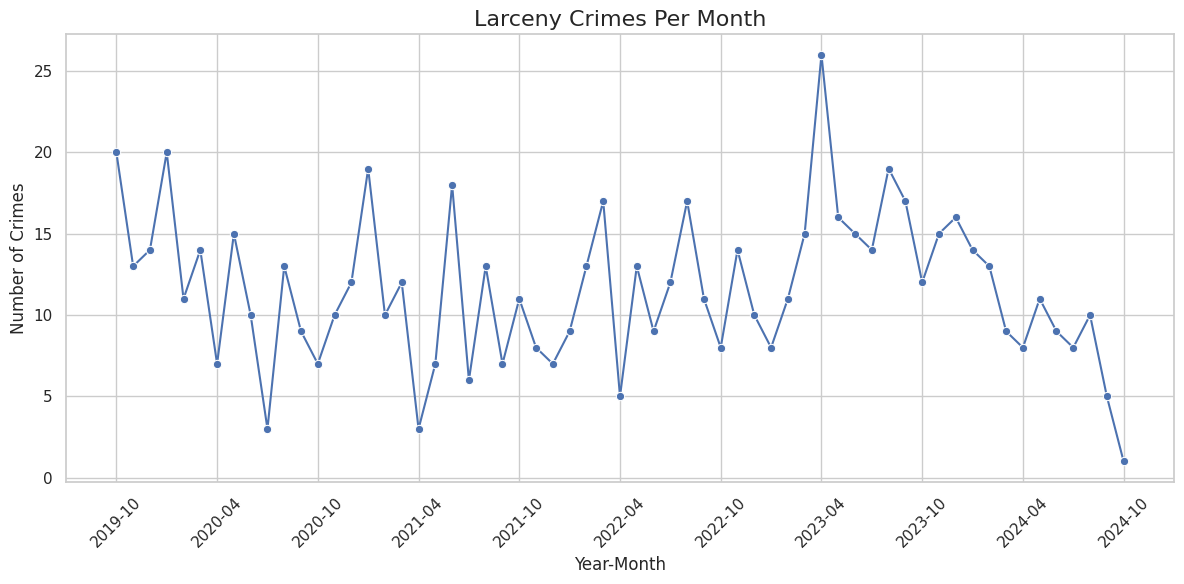

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data=crime_counts_by_month, x='Year-Month', y='Crime Count', marker='o')


ax.set_title('Larceny Crimes Per Month', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=12)
ax.set_ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45)


ax.set_xticks(ax.get_xticks()[::6])

plt.tight_layout()
plt.show()